In [3]:
import os
import csv
import numpy  as np
import pandas as pd

import matplotlib
matplotlib.use('nbagg')

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

import pprint
pp = pprint.PrettyPrinter(indent=4).pprint

# data_folder = "/Users/WillC/Documents/Rutgers/3rd_Year/Spring_Semester/intro-data-science/neolithic_prediction_modeling/data/EUROEVOL_Dataset"
# data_file = "EUROEVOL09-07-201516-34_CommonSites.csv"

data_file = 'common_elevations_and_distances.csv'
df = pd.read_csv(data_file, sep=',', error_bad_lines=False)

height_data_file = 'ireland_elevations_and_mindistances.csv'
height_df = pd.read_csv(height_data_file, sep=',', error_bad_lines=False)

pp(len(df))
pp(len(height_df))

list(height_df)

1522
660456


['id',
 'Latitude',
 'Longitude',
 'Elevation',
 'min_lakes_distance',
 'min_rivers_distance',
 'min_borders_distance']

# Find Ireland points in common*.csv

In [4]:
country1 = ''
country2 = 'Ireland'

country_df = df.where((df['Country'] == country1) | (df['Country'] == country2))
# country_df = df
# set min and max latitude and longitude
minlat = country_df['Latitude'].min()
maxlat = country_df['Latitude'].max()
minlon = country_df['Longitude'].min()
maxlon = country_df['Longitude'].max()

difflat = maxlat - minlat
difflon = maxlon - minlon

country_df = country_df.dropna()

# Find the minimum and maximum coordinates for plotting

In [5]:
# set min and max latitude and longitude
minlat = height_df['Latitude'].min()
maxlat = height_df['Latitude'].max()
minlon = height_df['Longitude'].min()
maxlon = height_df['Longitude'].max()

difflat = maxlat - minlat
difflon = maxlon - minlon

minlat -= (difflat / 10) * 2
maxlat += (difflat / 10) * 2
minlon -= (difflon / 10) * 2
maxlon += (difflon / 10) * 2


height_df = height_df.dropna()

### Choose the variable to represent as the heatmap

In [33]:
plot_variable = list(height_df)[3]
pp(list(height_df))
pp(plot_variable)

[   'id',
    'Latitude',
    'Longitude',
    'Elevation',
    'min_lakes_distance',
    'min_rivers_distance',
    'min_borders_distance']
'Elevation'


In [35]:
m = Basemap(projection='cyl',
            llcrnrlat=minlat,
            urcrnrlat=maxlat,     
            llcrnrlon=minlon,
            urcrnrlon=maxlon,
            resolution='f')

m.drawparallels(np.arange(int(minlat),int(maxlat),1),labels=[1,0,0,0])
m.drawmeridians(np.arange(int(minlon),int(maxlon),1),labels=[0,0,0,1])
m.fillcontinents(color='None')

m.drawcoastlines()
m.drawcountries()
m.drawstates()
# m.drawrivers()
# m.fillcontinents(color='#04BAE3', lake_color='#FFFFFF')
# m.drawmapboundary(fill_color='#FFFFFF')
# m.bluemarble()

# plot_variable = list(height_df)[4]

heightlat = np.array(height_df['Latitude'].tolist())
heightlon = np.array(height_df['Longitude'].tolist())
z = np.array(height_df[plot_variable].tolist())
x, y = m(heightlon, heightlat)
plt.scatter(x, y, c=z, s=1)
label=plot_variable + ' (meters)'
pp(label)
plt.colorbar(label=label)

lat = np.array(country_df['Latitude'].tolist())
lon = np.array(country_df['Longitude'].tolist())

x, y = m(lon, lat)
m.plot(x, y, 'r.', markersize=2)

title = 'Ireland ' + plot_variable + ' Heatmap,\nRed = Artifact Location'
pp(title)
plt.title(title)
plt.xlabel('\n\n\nLongitude')
plt.ylabel('Latitude\n\n\n')

'Elevation (meters)'
'Ireland Elevation Heatmap,\nRed = Artifact Location'


Text(0,0.5,u'Latitude\n\n\n')

<IPython.core.display.Javascript object>


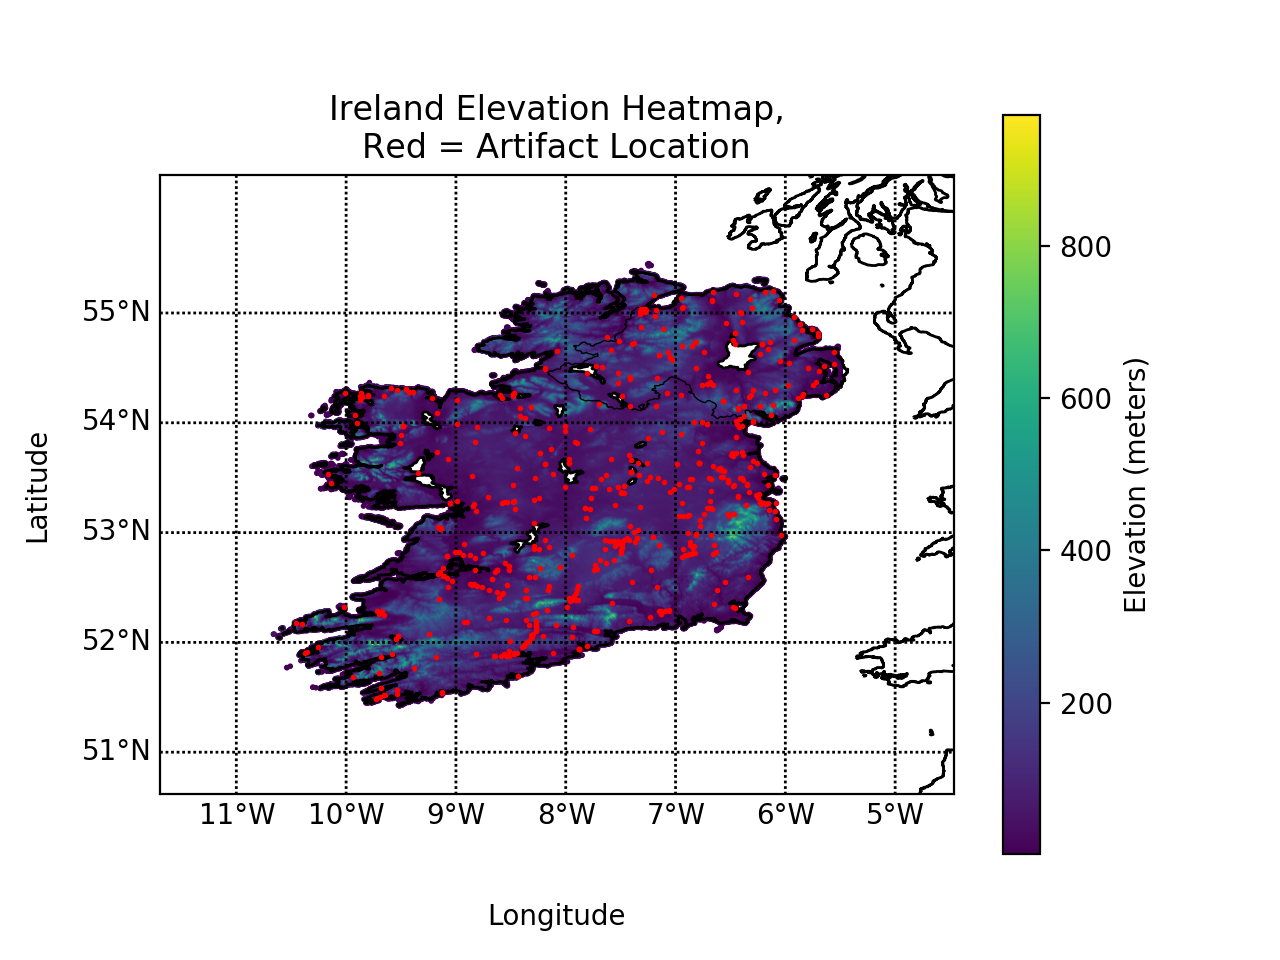

In [36]:
plt.show()